In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path_data='/content/survey_lung_cancer.csv'

In [ ]:
#read and visulise data
data=pd.read_csv(path_data)
data.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/survey_lung_cancer.csv'

In [ ]:
# shape
data.shape

(309, 16)

In [ ]:
#tying to get the onfo from dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [ ]:
data.columns=data.columns.str.title()
data.columns
data.head()


,Gender,Age,Smoking,Yellow_Fingers,Anxiety,Peer_Pressure,Chronic Disease,Fatigue,Allergy,Wheezing,Alcohol Consuming,Coughing,Shortness Of Breath,Swallowing Difficulty,Chest Pain,Lung_Cancer
0,MALE,69,0,1,1,0,0,1,0,1,1,1,1,1,1,YES
1,MALE,74,1,0,0,0,1,1,1,0,0,0,1,1,1,YES
2,FEMALE,59,0,0,0,1,0,1,0,1,0,1,1,0,1,NO
3,MALE,63,1,1,1,0,0,0,0,0,1,0,0,1,1,NO
4,FEMALE,63,0,1,0,0,0,0,0,1,0,1,1,0,0,NO


In [ ]:
#trying to see whether there is any missing value
data.isnull().sum()

Gender                   0
Age                      0
Smoking                  0
Yellow_Fingers           0
Anxiety                  0
Peer_Pressure            0
Chronic Disease          0
Fatigue                  0
Allergy                  0
Wheezing                 0
Alcohol Consuming        0
Coughing                 0
Shortness Of Breath      0
Swallowing Difficulty    0
Chest Pain               0
Lung_Cancer              0
dtype: int64

In [ ]:
#check duplicate data
data.duplicated().sum()

33

In [ ]:
#Remove duplicate data
data=data.drop_duplicates()



In [ ]:
data.columns

Index(['Gender', 'Age', 'Smoking', 'Yellow_Fingers', 'Anxiety',
       'Peer_Pressure', 'Chronic Disease', 'Fatigue ', 'Allergy ', 'Wheezing',
       'Alcohol Consuming', 'Coughing', 'Shortness Of Breath',
       'Swallowing Difficulty', 'Chest Pain', 'Lung_Cancer'],
      dtype='object')

In [ ]:
#new shape
rows=data.shape[0]
columns=data.shape[1]
print(f'There are {rows} rows and {columns} columns')

There are 276 rows and 16 columns


In [ ]:
#Let's describe the dataset
data.describe()

,Age,Smoking,Yellow_Fingers,Anxiety,Peer_Pressure,Chronic Disease,Fatigue,Allergy,Wheezing,Alcohol Consuming,Coughing,Shortness Of Breath,Swallowing Difficulty,Chest Pain
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,62.909420,0.543478,0.576087,0.496377,0.507246,0.521739,0.663043,0.547101,0.547101,0.550725,0.576087,0.630435,0.467391,0.557971
std,8.379355,0.499011,0.495075,0.500895,0.500856,0.500435,0.473529,0.498681,0.498681,0.498324,0.495075,0.483564,0.499842,0.497530
min,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,57.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,62.500000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
75%,69.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,87.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


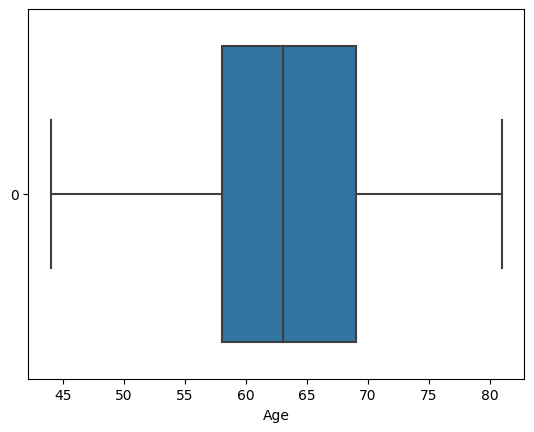

In [ ]:
#boxplot
import seaborn as sns
import matplotlib.pyplot as plt
q1=data['Age'].quantile(0.25)
q3=data['Age'].quantile(0.75)
iqr=q3-q1
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr
new_data=data[(data['Age']>=lower_limit)&(data['Age']<=upper_limit)]
sns.boxplot(new_data['Age'],orient='h')
plt.xlabel('Age')
plt.show()

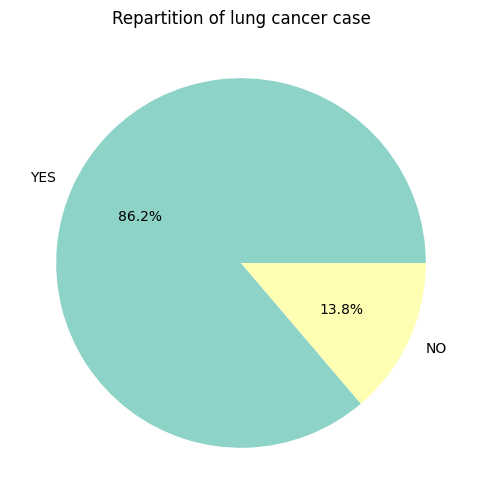

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
df=data['Lung_Cancer'].value_counts()

#create a pie using seaborn
plt.figure(figsize=(6,6))
sns.set_palette('Set3')
plt.pie(df,labels=df.index,autopct='%1.1f%%')
plt.title('Repartition of lung cancer case')
plt.show()

In [ ]:
gender_cancer=data.groupby('Gender')['Lung_Cancer'].value_counts()
gender_cancer

Gender  Lung_Cancer
FEMALE  YES            113
        NO              21
MALE    YES            125
        NO              17
Name: Lung_Cancer, dtype: int64

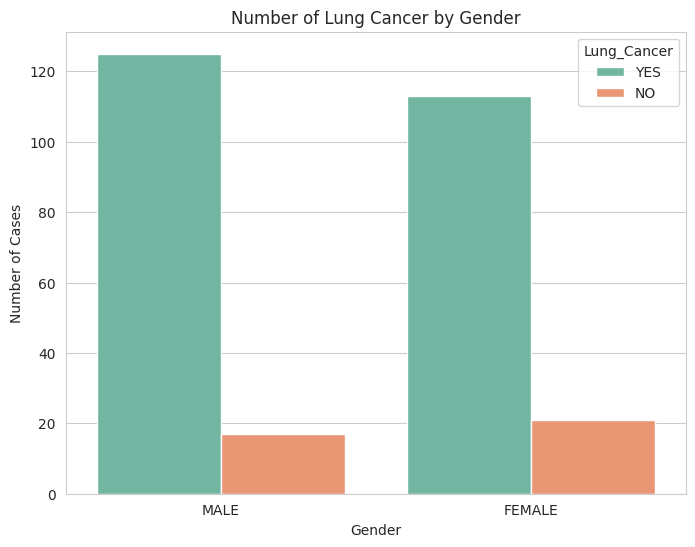

In [ ]:
#create a countplot
plt.figure(figsize=(8,6))
sns.set_style('whitegrid')
sns.set_palette('Set2')
sns.countplot(data=data,x='Gender',hue='Lung_Cancer')
plt.title('Number of Lung Cancer by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Cases')
plt.show()

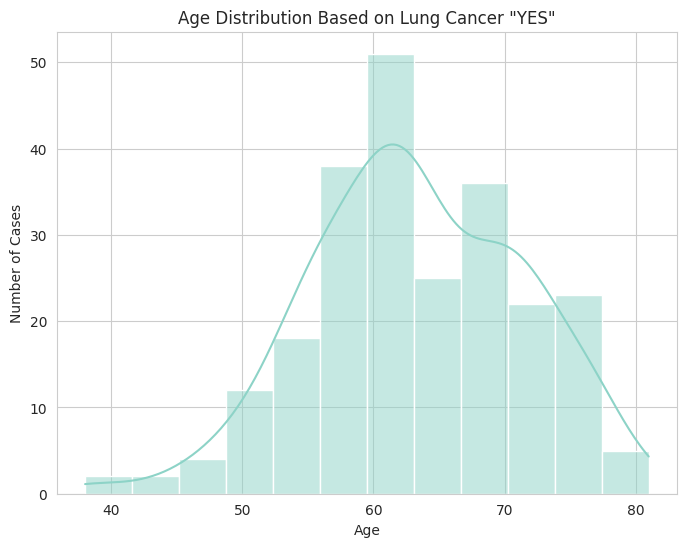

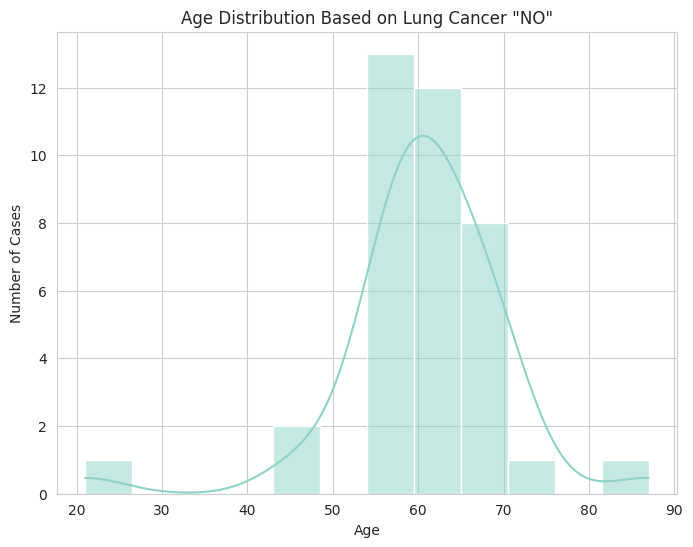

In [ ]:
#create a histogram for the age of 'yes' lung cancer cases
sns.set_palette('Set3')
plt.figure(figsize=(8,6))
sns.set_style('whitegrid')
sns.histplot(data=data[data['Lung_Cancer']=='YES'],x='Age',kde=True)
plt.title('Age Distribution Based on Lung Cancer "YES"')
plt.xlabel('Age')
plt.ylabel('Number of Cases')
plt.show()

#create a histogram for the age of 'no' lung cancer cases
plt.figure(figsize=(8,6))
sns.histplot(data=data[data['Lung_Cancer']=='NO'],x='Age',kde=True)
plt.title('Age Distribution Based on Lung Cancer "NO"')
plt.xlabel('Age')
plt.ylabel('Number of Cases')
plt.show()

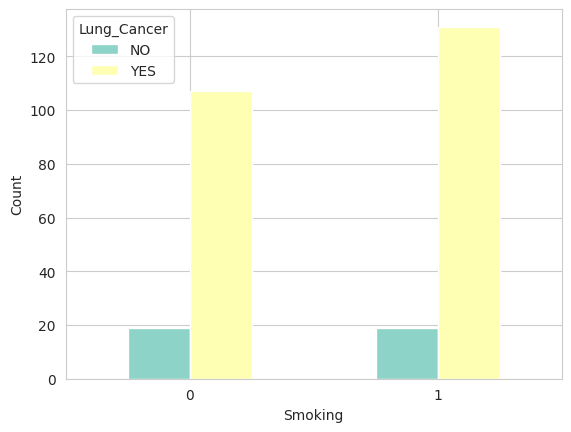

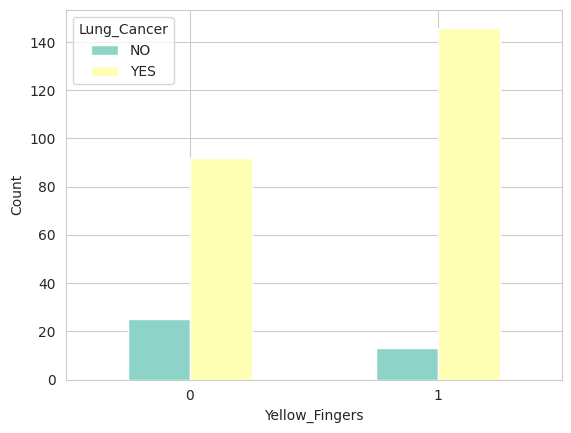

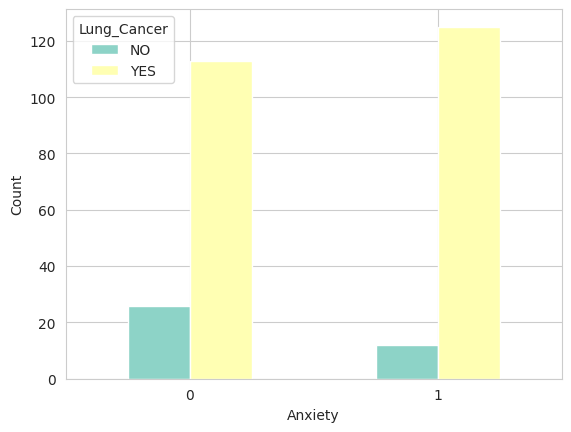

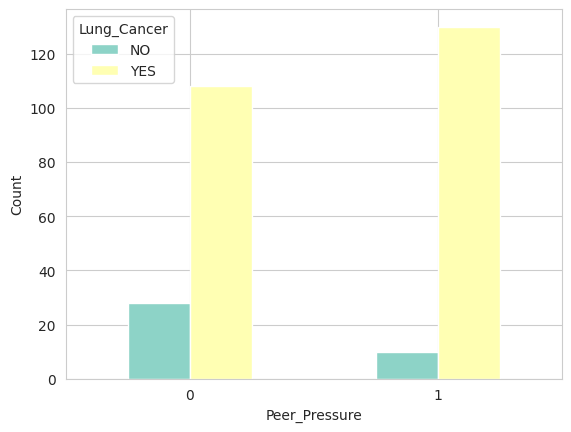

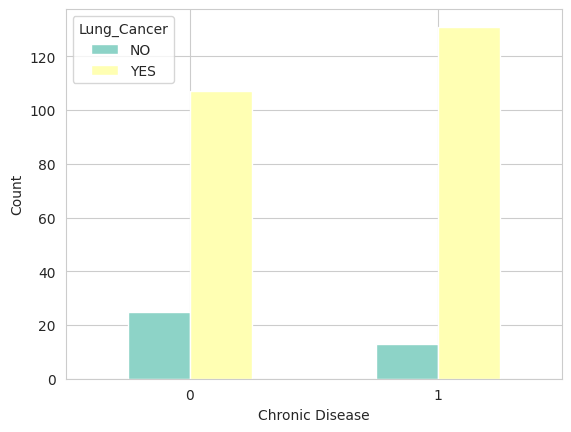

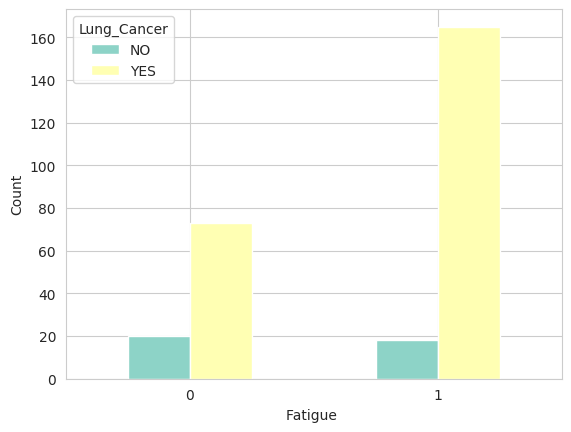

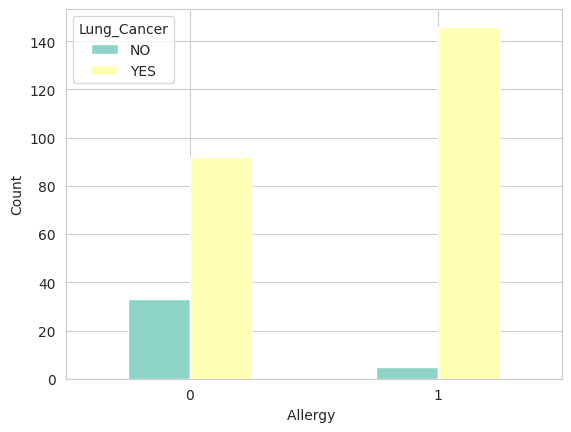

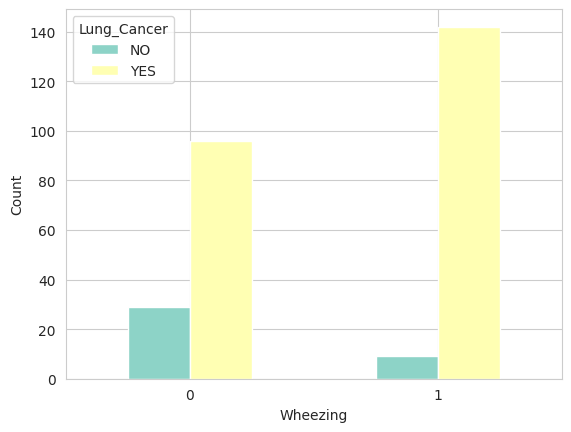

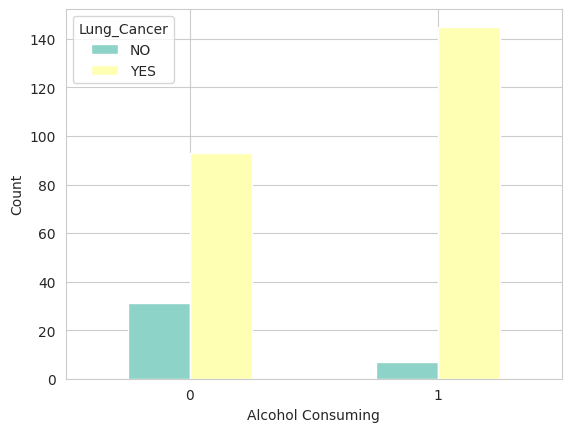

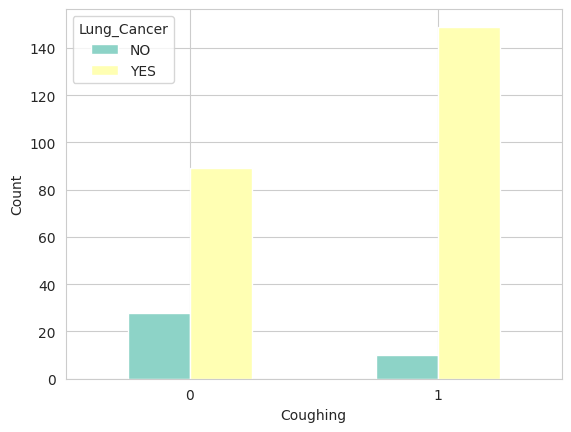

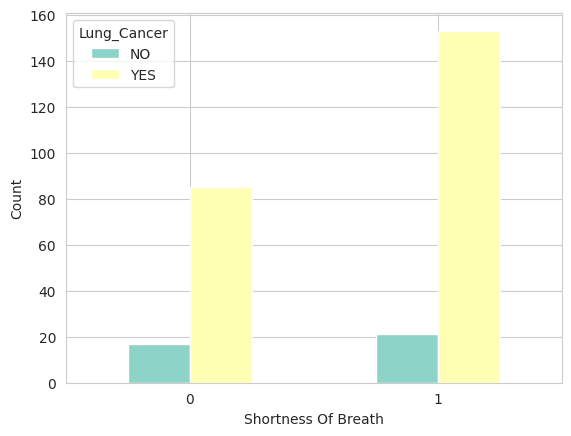

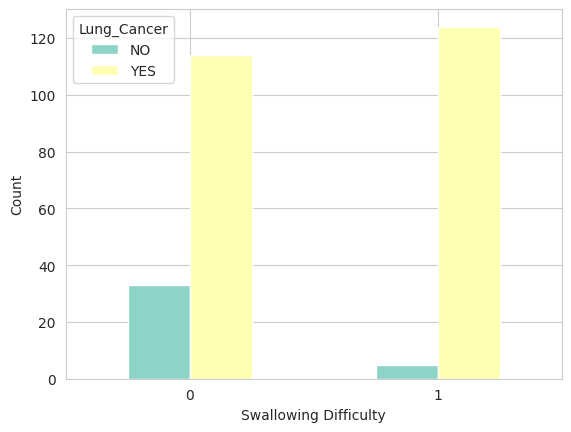

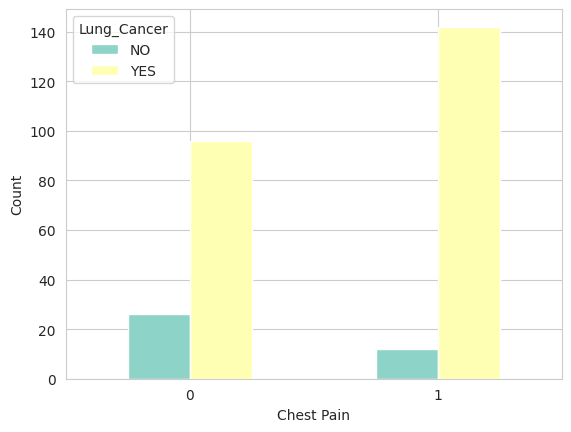

In [ ]:
col=data.columns[2:15].tolist()
for variable in col:
  cross_tab=pd.crosstab(data[variable],data['Lung_Cancer'])
  #CROSSTAB PLOT
  cross_tab.plot(kind='bar',stacked=False,rot=0)
  plt.xlabel(variable)
  plt.ylabel('Count')
  plt.legend(title='Lung_Cancer',labels=['NO','YES'])
  plt.show()


In [ ]:
#select column
column_select=data.columns[0:15].tolist()
new_col=data.columns.tolist()
new_col

['Gender',
 'Age',
 'Smoking',
 'Yellow_Fingers',
 'Anxiety',
 'Peer_Pressure',
 'Chronic Disease',
 'Fatigue ',
 'Allergy ',
 'Wheezing',
 'Alcohol Consuming',
 'Coughing',
 'Shortness Of Breath',
 'Swallowing Difficulty',
 'Chest Pain',
 'Lung_Cancer']

In [ ]:
#convert categorical column to numerical
data['Gender']=data['Gender'].map({'MALE':1,'FEMALE':0})
data['Lung_Cancer']=data['Lung_Cancer'].map({'YES':1,'NO':0})

data_max=data['Age'].max()
data['Age']=data['Age']/data_max
data.head()



,Gender,Age,Smoking,Yellow_Fingers,Anxiety,Peer_Pressure,Chronic Disease,Fatigue,Allergy,Wheezing,Alcohol Consuming,Coughing,Shortness Of Breath,Swallowing Difficulty,Chest Pain,Lung_Cancer
0,1,0.793103,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,0.850575,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,0.678161,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,0.724138,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,0.724138,0,1,0,0,0,0,0,1,0,1,1,0,0,0


In [ ]:
from scipy.stats import ttest_ind
Lung_Cancer_yes=data[data['Lung_Cancer']=='1']
Lung_Cancer_no=data[data['Lung_Cancer']=='0']
t_stat,p_value=ttest_ind(Lung_Cancer_yes['Age'],Lung_Cancer_no['Age'])
if p_value <0.05:
  print('There is a significant relationship between age and Lung_Cancer')
else:
  print('There is a no  significant relationship between age and Lung_Cancer')

There is a no  significant relationship between age and Lung_Cancer


In [ ]:
from scipy.stats import chi2_contingency

for column in column_select:
  contingency_table=pd.crosstab(data[column],data['Lung_Cancer'])
  chi2, p, _, _=chi2_contingency(contingency_table)
  print(f'P value for {column} vs Lung_Cancer:{p}')

  if p<0.05:
    print(f'There is a significative relation between {column} and Lung_Cancer')
  else:
    print(f'There is not a significative relation between {column} ans Lung_Cancer')

NameError: ignored

**Model Training and Test**

we need to split daat into training(80%), testing(20%)

In [ ]:
#store all columns except last one as inpute in x
x=data.iloc[:,2:-1].values

#sore the last columns as the output(label) in y
y=data.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

logistic_model=LogisticRegression()
logistic_model.fit(x_train,y_train)
y_pred=logistic_model.predict(x_test)
accuracy_train=logistic_model.score(x_train,y_train)
accuracy_test=logistic_model.score(x_test,y_test)
precison
print(accuracy_train)
print(accuracy_test)



0.9227272727272727
0.9107142857142857


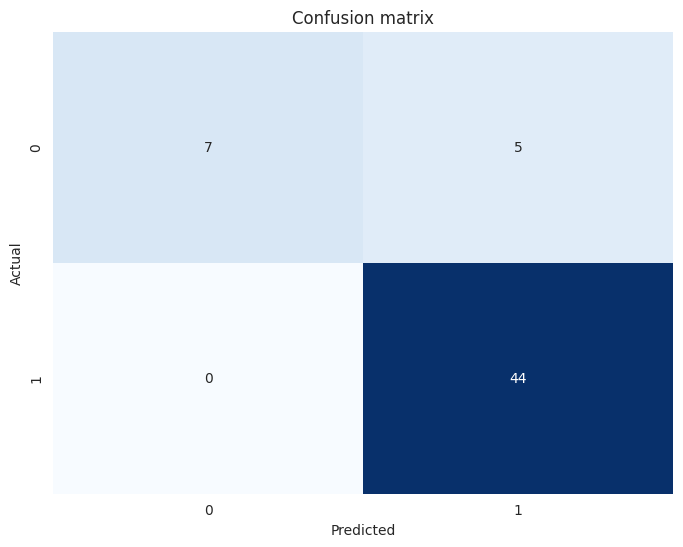

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix')
plt.show()

**Features importance**

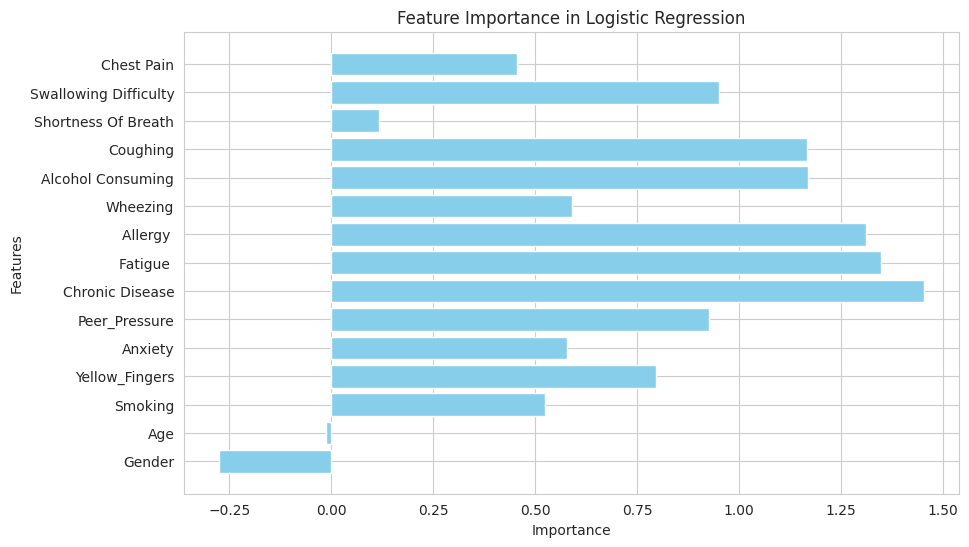

In [ ]:
columns_names=data.columns[0:-1].values
feature_importance=logistic_model.coef_[0]

plt.figure(figsize=(10,6))
plt.barh(columns_names,feature_importance,color='skyblue')
plt.title('Feature Importance in Logistic Regression')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()